In [18]:
import tensorflow as tf 
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,Dropout  
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical
import numpy as np 
import matplotlib.pyplot as plt  
plt.style.use('fivethirtyeight')

In [2]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 108s 1us/step


In [3]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

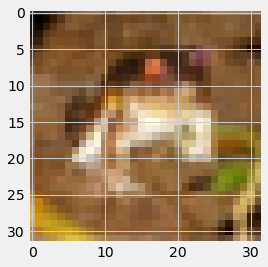

In [5]:
img=plt.imshow(X_train[0])

In [6]:
y_train[0]

array([6], dtype=uint8)

In [10]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(classification[y_train[0][0]])

frog


In [11]:
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [12]:
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [14]:
X_train=X_train/255
X_test=X_test/255

In [20]:
model=Sequential()
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
hist=model.fit(X_train,y_train_one_hot,batch_size=256,epochs=10,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 72s 243ms/step - loss: 2.0282 - accuracy: 0.2256 - val_loss: 1.5125 - val_accuracy: 0.4496
Epoch 2/10
157/157 [==============================] - 36s 227ms/step - loss: 1.4947 - accuracy: 0.4483 - val_loss: 1.3550 - val_accuracy: 0.5093
Epoch 3/10
157/157 [==============================] - 36s 231ms/step - loss: 1.3295 - accuracy: 0.5184 - val_loss: 1.2555 - val_accuracy: 0.5461
Epoch 4/10
157/157 [==============================] - 37s 235ms/step - loss: 1.2214 - accuracy: 0.5605 - val_loss: 1.1681 - val_accuracy: 0.5800
Epoch 5/10
157/157 [==============================] - 36s 232ms/step - loss: 1.1159 - accuracy: 0.6029 - val_loss: 1.0807 - val_accuracy: 0.6179
Epoch 6/10
157/157 [==============================] - 36s 232ms/step - loss: 1.0391 - accuracy: 0.6308 - val_loss: 1.0285 - val_accuracy: 0.6401
Epoch 7/10
157/157 [==============================] - 36s 233ms/step - loss: 0.9816 - accuracy: 0.6525 - val_loss: 1.0560 - val_ac

In [23]:
model.evaluate(X_test,y_test_one_hot)[0]

313/313 [==============================] - 4s 13ms/step - loss: 1.0015 - accuracy: 0.6567


1.0015101432800293

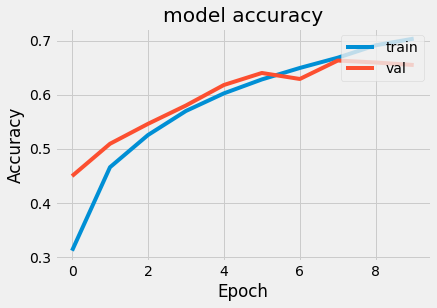

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc='upper right')

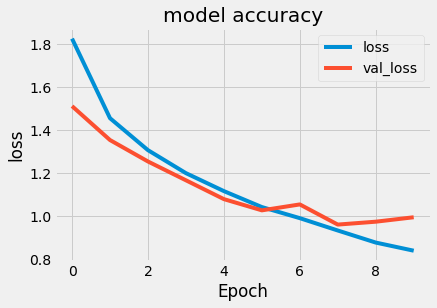

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','val_loss'],loc='upper right')

In [40]:
from PIL import Image
im = Image.open("67586673.jpg")

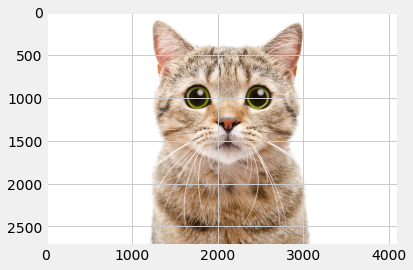

In [44]:
new_img=plt.imread("67586673.jpg")
plt.imshow(im)

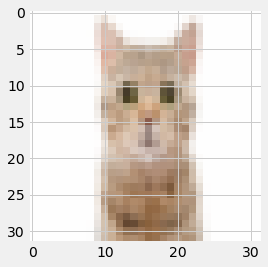

In [45]:
from skimage.transform import resize  
resized_image=resize(new_img,(32,32,3))
im=plt.imshow(resized_image)

In [46]:
prediction=model.predict(np.array([resized_image]))
prediction

array([[4.9458136e-04, 2.3178993e-05, 6.0973369e-02, 1.1776505e-01,
        2.4823477e-03, 7.8918272e-01, 2.1599239e-02, 3.0726804e-03,
        4.3105483e-03, 9.6342810e-05]], dtype=float32)

In [47]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(0,len(list_index)):
    for j in range(0,len(list_index)):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)

[5, 3, 2, 6, 8, 7, 4, 0, 9, 1]


In [48]:
for i in range(5):
    print(classification[list_index[i]])

dog
cat
bird
frog
ship
